In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
shops = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

# Exploratory Data Analysis

In [45]:
shops

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,159,92,795,90,1,credit_card,3/29/2017 3:07
1,3872,92,818,90,1,debit,3/18/2017 9:10
2,4761,92,937,90,1,debit,3/20/2017 7:37
3,4924,92,965,90,1,credit_card,3/9/2017 5:05
4,4933,92,823,90,1,credit_card,3/24/2017 2:17
...,...,...,...,...,...,...,...
4995,2154,42,607,704000,2000,credit_card,3/12/2017 4:00
4996,1563,42,607,704000,2000,credit_card,3/19/2017 4:00
4997,1363,42,607,704000,2000,credit_card,3/15/2017 4:00
4998,521,42,607,704000,2000,credit_card,3/2/2017 4:00


In [5]:
shops.shape

(5000, 7)

In [6]:
shops['shop_id'].value_counts()

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

### The way Shopify achieved its original value of $3145.13 was by taking the sum of all orders during the month of March and dividing it by the number of orders in the dataset which was 5000. Essentially, this was the mean of the order amounts of this dataset

In [7]:
shops['order_amount'].sum()/shops.shape[0]

3145.128

In [8]:
shops['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

### Lets make a scatterplot representing the order amounts

Text(0.5, 1.0, 'Total Items vs Order Amounts')

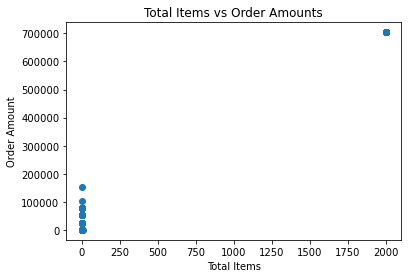

In [43]:
plt.scatter(x = shops['total_items'], y = shops['order_amount'])
plt.xlabel('Total Items')
plt.ylabel('Order Amount')
plt.title('Total Items vs Order Amounts')

### Histogram representing the order amounts

Text(0, 0.5, 'Frequency')

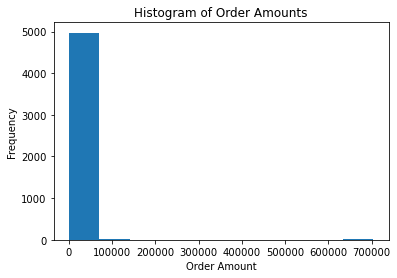

In [40]:
plt.hist(shops['order_amount'], bins = 10)
plt.title('Histogram of Order Amounts')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')

### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

### If you look at the standard deviation, it is extremely high. The definition of standard deviation is the average of every data point from the mean. The higher your standard deviation is, the more spread out your data is. In addition, if we look at the the scatterplot/histogram from above, we see that most of our data is skewed towards lower order values, indicating that the rest of the data are potential outliers. A better way to evaluate this data would be to remove the outliers including the datapoints that are in the top 3% of our data

In [11]:
shops = shops.sort_values(by = ['order_amount'])
shops = shops.reset_index(drop = True)
shops_without_outliers = shops.loc[0:4850]

In [12]:
shops_without_outliers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,159,92,795,90,1,credit_card,3/29/2017 3:07
1,3872,92,818,90,1,debit,3/18/2017 9:10
2,4761,92,937,90,1,debit,3/20/2017 7:37
3,4924,92,965,90,1,credit_card,3/9/2017 5:05
4,4933,92,823,90,1,credit_card,3/24/2017 2:17
...,...,...,...,...,...,...,...
4846,1909,90,798,712,4,cash,3/5/2017 0:06
4847,4749,90,789,712,4,credit_card,3/29/2017 7:56
4848,979,90,734,712,4,credit_card,3/16/2017 2:09
4849,886,59,841,712,4,credit_card,3/28/2017 21:11


In [13]:
shops_without_outliers['order_amount'].describe()

count    4851.000000
mean      293.011750
std       143.528265
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       712.000000
Name: order_amount, dtype: float64

In [14]:
pd.DataFrame(shops_without_outliers.groupby(by = 'user_id')['order_amount'].mean())

,order_amount
user_id,
700,299.375000
701,397.076923
702,376.750000
703,380.687500
704,275.285714
...,...
995,316.857143
996,252.952381
997,292.583333


Text(0, 0.5, 'Frequency')

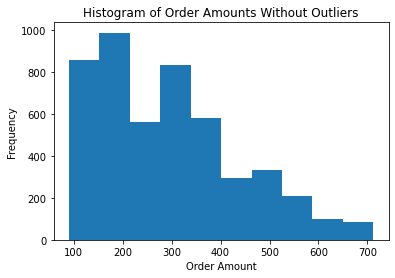

In [42]:
plt.hist(shops_without_outliers['order_amount'], bins = 10)
plt.title('Histogram of Order Amounts Without Outliers')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')

# b/c.	What metric would you report for this dataset?/What is its value?
Different Possible Ways to Represent this Data

In [60]:
table = [{'Value': '$3145.13','Pros': 'Easy to Compute and communicate', 'Cons': 'Skewed by outliers and no sense of range'},
         {'Value': '$293.01', 'Pros': 'Easy to Compute and communicate', 'Cons': 'Judgement required on outliers and no sense of range' },
         {'Value': 'Shown on Table Below', 'Pros': 'Identifies one potential driver of order value', 'Cons': 'Harder to communicate in one metric'},
         {'Value': 'Shown on Table Below', 'Pros': 'Highlights potential trends','Cons': 'Harder to communicate in one metric'}]
pd.DataFrame(table, index = ['Average Order Value', 'Average Order Value without Outliers', 'Average Order Value by Shops', 'Average Order by Day'])

,Value,Pros,Cons
Average Order Value,$3145.13,Easy to Compute and communicate,Skewed by outliers and no sense of range
Average Order Value without Outliers,$293.01,Easy to Compute and communicate,Judgement required on outliers and no sense of...
Average Order Value by Shops,Shown on Table Below,Identifies one potential driver of order value,Harder to communicate in one metric
Average Order by Day,Shown on Table Below,Highlights potential trends,Harder to communicate in one metric


In [16]:
shops_without_outliers['order_amount'].mean()

293.0117501546073

### Average Order Value By Shop/Total Order Count

In [36]:
avg_shop = shops_without_outliers.groupby(by = 'shop_id')['order_amount'].mean().sort_values()
avg_shop = pd.DataFrame(avg_shop)
avg_shop['Count'] = shops_without_outliers['shop_id'].value_counts()
avg_shop.

,order_amount,Count
shop_id,,
92,162.857143,42
2,174.327273,55
32,189.976190,42
100,213.675000,40
53,214.117647,68
...,...,...
33,363.743590,39
50,371.878049,41
81,384.000000,59


In [26]:
shops_without_outliers['shop_id'].value_counts()

53    68
71    66
19    63
13    62
69    60
      ..
56    37
67    36
85    35
38    31
42    28
Name: shop_id, Length: 99, dtype: int64

### Average Order By Day

In [647]:
shops['created_at'] = pd.to_datetime(shops['created_at']) 
shops = shops.groupby([pd.Grouper(key='created_at', freq='D')])['order_amount'].mean()
pd.DataFrame(shops)

,order_amount
created_at,
2017-03-01,583.263736
2017-03-02,8725.873626
2017-03-03,300.796296
2017-03-04,5184.872727
2017-03-05,774.803681
2017-03-06,285.581081
2017-03-07,7478.826531
2017-03-08,278.410256
2017-03-09,961.241206


###  Answer: Depending on the objective, different metrics may be used. The metrics could be used together to build a more robust picture. For one simple, easy to communicate number, I would recommend using average order size excluding outliers to show the average of a more representative sample.

# Other interesting metrics

### - Average Number of Sneakers Per Order

In [688]:
shops_without_outliers['total_items'].mean()

1.9464028035456606

### - Another way of representing this data from a machine learning perspective is through methods of Clustering including K-Means or Density Based Spacial Applications of Noise which involves grouping data points by density. This is beneficial because it classifies the outliers in the low-density region. Models in general can help predict the price of an order.